In [17]:
from __future__ import print_function
import numpy as np
import pandas as pd
import torch.nn as nn
import math
import torch.nn.functional as F
import torch
import torchvision
from torch.nn import init
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision import models
import torch.nn.functional as F
from torch.utils import data
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset
import torch

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## 1. Generate the unlabeled dataset from labeled and plot.

In [19]:

# Class 1
mean = [0, 0]
cov = [[1, 1], [0, 100]]
x1, y1 = np.random.multivariate_normal(mean, cov, 500).T
plt.plot(x1, y1, 'x')

# Class 2
mean = [-30, -20]
cov = [[0, 1], [100, 100]]
x2, y2 = np.random.multivariate_normal(mean, cov, 500).T
plt.plot(x2, y2, 'x')

# Class 3
mean = [30, 20]
cov = [[0, 1], [100, 100]]
x3, y3 = np.random.multivariate_normal(mean, cov, 500).T
plt.plot(x3, y3, 'x')

# concatenate the data from all classes
X = np.concatenate([np.array(list(zip(x1, y1))) ,
                    np.array(list(zip(x2, y2))) ,
                    np.array(list(zip(x3, y3)))])

# plot the unlabeled data
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], color='gray', label='Unlabeled Data')
plt.legend(loc='best')
plt.title('Unlabeled Data with Unknown Number of Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


/var/folders/l6/vp973_952_j17ld7jjj33fg40000gn/T/ipykernel_41518/1104856810.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  x1, y1 = np.random.multivariate_normal(mean, cov, 500).T
/var/folders/l6/vp973_952_j17ld7jjj33fg40000gn/T/ipykernel_41518/1104856810.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  x2, y2 = np.random.multivariate_normal(mean, cov, 500).T
/var/folders/l6/vp973_952_j17ld7jjj33fg40000gn/T/ipykernel_41518/1104856810.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  x3, y3 = np.random.multivariate_normal(mean, cov, 500).T


## 2 . Apply K-means clustering algorithm on the created unlabeled dataset

/Users/rahimhossain/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


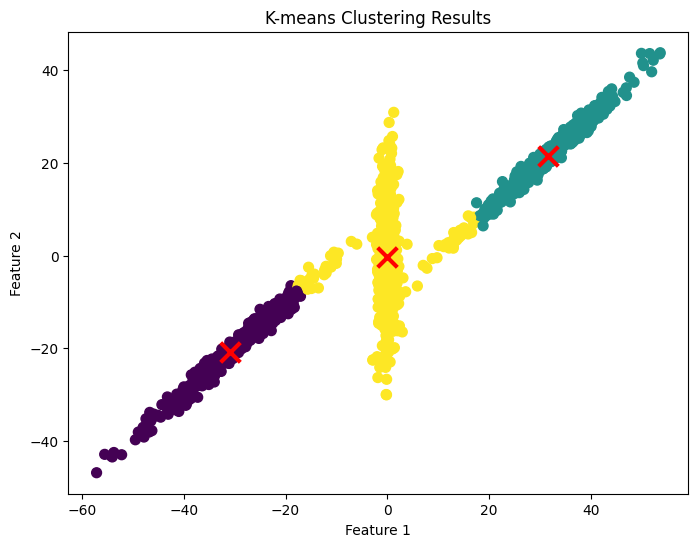

In [20]:
from sklearn.cluster import KMeans

# apply K-means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# plot the K-means clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            color='red', marker='x', s=200, linewidths=3)
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Implementing my own k-means algorithm

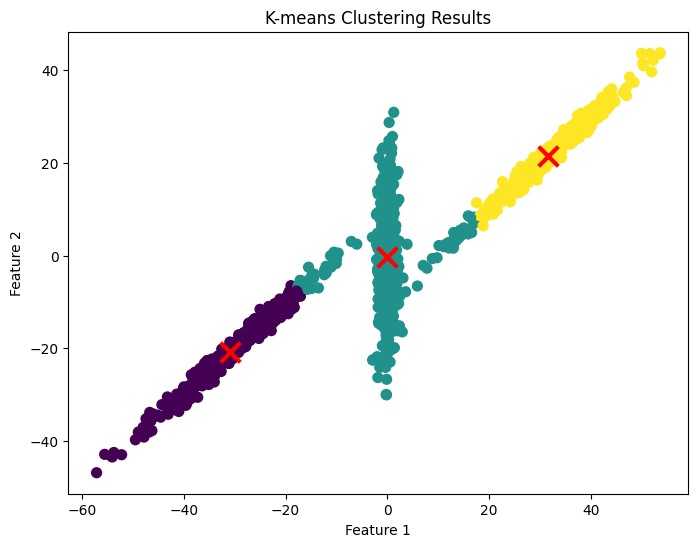

In [21]:
def kmeans(X, K, max_iter=100):
    # randomly initialize K cluster centers
    centers = X[np.random.choice(X.shape[0],
                                 K, replace=False)]
    
    for i in range(max_iter):
        # assign each data point to the nearest cluster center
        distances = np.linalg.norm(X[:,np.newaxis, :] - centers, 
                                   axis=2)
        labels = np.argmin(distances, axis=1)
        
        # recalculate the cluster centers
        new_centers = np.array([X[labels == k].mean(axis=0)
                                for k in range(K)])
        
        # check for convergence
        if np.all(centers == new_centers):
            break
        
        centers = new_centers
        
    return labels, centers

# apply K-means clustering algorithm
K = 3
labels, centers = kmeans(X, K)

# plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], color='red',
            marker='x', s=200, 
            linewidths=3)
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 3 . Vary K from 2-9 and evaluate the k-means algorithmâ€™s performance based on any Quantitative evaluation metric of k-means of your choice and plot it

 One commonly used quantitative evaluation metric for K-means clustering is the Silhouette Score. It measures how well each data point fits into its assigned cluster, based on its similarity to its own cluster compared to the similarity to other clusters. A score closer to 1 indicates good clustering, while a score closer to -1 indicates poor clustering.

In [22]:
from sklearn.metrics import silhouette_score

np.random.seed(0)
X = np.random.randn(500, 2)
X[:200] += np.array([2, 2])
X[200:400] += np.array([-2, 2])
X[400:] += np.array([0, -3])

K_range = range(2, 10)
silhouette_scores = []
for K in K_range:
    labels, centers = kmeans(X, K)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"K={K}, Silhouette Score={score:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, 'bx-')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


K=2, Silhouette Score=0.405
K=3, Silhouette Score=0.585
K=4, Silhouette Score=0.453
K=5, Silhouette Score=0.385
K=6, Silhouette Score=0.346
K=7, Silhouette Score=0.351
K=8, Silhouette Score=0.327
K=9, Silhouette Score=0.339


## 6. Give convincing reasoning why would you choose a certain value of K for this problem

For k=3 we got the best silhouette score. So we will choose 3 clusters.

## 7. Label the dataset again with your preferred k and plot in different color in same graph.

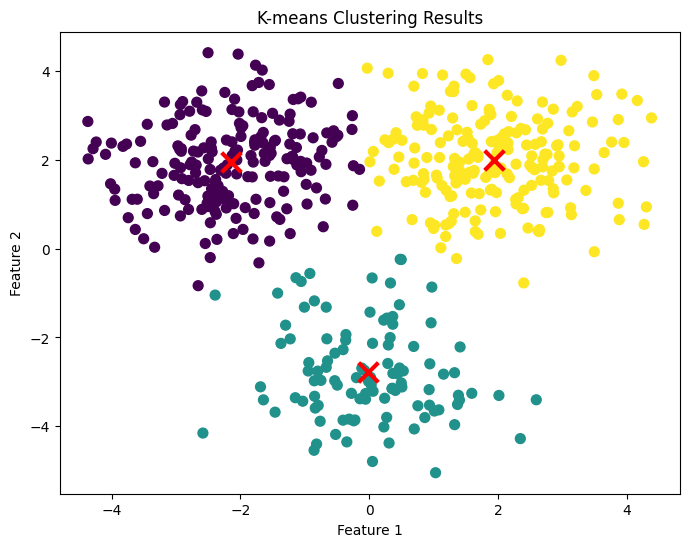

In [23]:
# apply K-means clustering algorithm
K = 3
labels, centers = kmeans(X, K)

# plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], color='red',
            marker='x', s=200, linewidths=3)
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()